In [ ]:
### This code contains the analysis shown in Figure 2 and Extended Data Figure 8

### Load Packages and Data Files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
import ma_codes as codes
from ma_codes import mysize, gray_red, mymap
import pertpy as pt
%matplotlib inline
import math
from scipy.stats import mannwhitneyu


import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

sc.settings.verbosity = 3               # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_version_and_date()

import warnings
warnings.filterwarnings("ignore")

Running Scanpy 1.10.2, on 2025-06-03 15:50.


In [2]:
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"

plt.rcParams["figure.figsize"] = (6, 5)
plt.rcParams.update({'font.size': 14})
plt.rcParams['pdf.fonttype'] = 42

In [3]:
object_folder = "/media/HDD_1/Janine/Aging_SingleCell/data_objects/"
adata = sc.read(object_folder + "230111_Bleo_Ageing_annotated_final.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 160477 × 29814
    obs: 'age', 'barcode', 'batch', 'day', 'name', 'sex', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'doublet_scores', 'size_factors', 'S_score', 'G2M_score', 'phase', 'time_point', 'leiden_1', 'leiden_2', 'domain', 'cell_type', 'ct_level2', 'compartment_label', 'meta_label', 'age_treatment', 'age_day'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'age_colors', 'age_day_colors', 'age_treatment_colors', 'batch_colors', 'cell_type_colors', 'compartment_label_colors', 'ct_level2_colors', 'day_colors', 'dendrogram_cell_type', 'domain_colors', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'meta_label_colors', 'name_colors', 'neighbors', 'pca', 'sex_colors', 'time_point_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'unsouped_counts'
    obsp: 'connect

In [5]:
sc.set_figure_params(adata, dpi=80, dpi_save=300, vector_friendly=True, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')

### Senescence Signature Scorings

In [6]:
sen_genes = ["Calm1", "Calm2", "Capn2", "Ccnd1", "Ccnd2", "Cdk4", "Cdkn1a", "Cdkn2b", "Eif4ebp1", 
             "Ets1", "Gadd45b", "H2-D1", "H2-K1", "H2-Q4", "H2-Q6", "H2-Q7", "H2-T22", "H2-T23", 
             "Kras", "Map2k2", "Mapk13", "Mapk3", "Myc", "Ppid", "Ppp1ca", "Ppp3ca", "Rbbp4", "Rheb", 
             "Rras", "Sqstm1", "Slc25a4", "Tgfb2", "Trp53", "Vdac1", "Vdac2", "Vdac3", "Zfp36l1"]
sc.tl.score_genes(adata, gene_list = sen_genes, score_name = "SENESCENCE (Strunz et al.)")

SASP = ['Vegfa','Tnfrsf12A','Tnfrsf10C','Tnfrsf10B','Timp2',
        'Timp1','Tgfb1','Serpine1','Tnfrsf1A','Plaur','Plau','Mmp14','Mmp13','Mmp7','Mmp3','Mif',
        'Lmna','Kitlg','Il32','Igfbp7','Igfbp2','Icam1','Fas','Ereg','Cxcl17','Cxcl16',
        'Cxcl8','Cxcl1','Ctsb','Clu','Ccl20','Ccl2','Btc','Areg']
sc.tl.score_genes(adata, gene_list = SASP, score_name = "SASP")

SenMayo = ['Acvr1b','Ang','Angpt1','Angptl4','Areg','Axl','Bex3','Bmp2','Bmp6',
           'C3','Ccl1','Ccl2','Ccl20','Ccl24','Ccl26','Ccl3','Ccl4','Ccl5','Ccl7',
           'Ccl8','Cd55','Cd9','Csf1','Csf2','Csf2rb','Cst10','Ctnnb1','Ctsb','Cxcl1','Cxcl10',
           'Cxcl12','Cxcl16','Cxcl2','Cxcl3','Cxcr2','Dkk1','Edn1','Egf',
           'Egfr','Ereg','Esm1','Ets2','Fas','Fgf1','Fgf2','Fgf7','Gdf15',
           'Gem','Gmfg','Hgf','Hmgb1','Icam1','Icam5','Igf1','Igfbp1','Igfbp2',
           'Igfbp3','Igfbp4','Igfbp5','Igfbp6','Igfbp7','Il10','Il13','Il15','Il18','Il1a','Il1b','Il2',
           'Il6','Il6st','Il7','Inha','Iqgap2','Itga2','Itpka','Jun','Kitl','Lcp1',
           'Mif','Mmp13','Mmp10','Mmp12','Mmp13','Mmp14','Mmp2','Mmp3','Mmp9','Nap1l4','Nrg1','Pappa',
           'Pecam1','Pgf','Pigf','Plat','Plau','Plaur','Ptbp1','Ptger2','Ptges','Rps6ka5','Scamp4',
           'Selplg','Sema3f','Serpinb3a','Serpine1','Serpine2','Spp1','Spx','Timp2','Tnf','Tnfrsf11b',
           'Tnfrsf1a','Tnfrsf1b','Tubgcp2','Vegfa','Vegfc','Vgf','Wnt16','Wnt2']
sc.tl.score_genes(adata, gene_list = SenMayo, score_name = "SenMayo")

Fried = "OPTN,CDKN1A,CDKN1C,CDKN2A,CDKN2B,CDKN2D,CITED2,HTATIP2,HBS1L,RAB31,ESM1,HPS5,FILIP1L,CLTB,COL1A2,CRYAB,CCN2,CYP1B1,F3,ALDH1A3,FN1,TES,GSN,GUK1,NRG1,HSPA2,IGSF3,IFI16,IFNG,IGFBP1,IGFBP2,IGFBP3,IGFBP4,IGFBP5,IGFBP6,IGFBP7,ING1,IRF5,IRF7,RHOB,MDM2,MMP1,NDN,NME2,SERPINE1,SERPINB2,MAP2K3,RGL2,RAB5B,RAB13,RABGGTA,RAC1,RBL2,CCND1,RRAS,S100A11,SMURF2,SMPD1,SOD1,SPARC,STAT1,TFAP2A,TGFB1I1,THBS1,TNFAIP2,TNFAIP3,TP53,VIM,MAP1LC3B,AOPEP,TSPYL5,PEA15,CREG1,EIF2S2,CXCL14,CD44,ISG15"
# split the strings and store it to a list
def Convert(string):
    li = list(string.split(","))
    return li
Fried = Convert(Fried)
Fried = [item.capitalize() for item in Fried]
sc.tl.score_genes(adata, gene_list = Fried, score_name = "FRIDMAN_SENESCENCE")

computing score 'SENESCENCE (Strunz et al.)'
    finished: added
    'SENESCENCE (Strunz et al.)', score of gene set (adata.obs).
    349 total control genes are used. (0:00:00)
computing score 'SASP'
       'Cxcl8'],
      dtype='object')
    finished: added
    'SASP', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'SenMayo'
    finished: added
    'SenMayo', score of gene set (adata.obs).
    996 total control genes are used. (0:00:00)
computing score 'FRIDMAN_SENESCENCE'
    finished: added
    'FRIDMAN_SENESCENCE', score of gene set (adata.obs).
    697 total control genes are used. (0:00:00)


In [7]:
%%R
library(msigdbr)
library(dplyr)

# Define the pathways of interest
hallmark_sets <- c(
    "HALLMARK_P53_PATHWAY",
    "HALLMARK_DNA_REPAIR",
    "HALLMARK_INFLAMMATORY_RESPONSE",
    "HALLMARK_PROTEIN_SECRETION"    
)

# Retrieve mouse hallmark gene sets
msigdb_mouse <- msigdbr(species = "Mus musculus", category = "H")

# Filter for the specified pathways
msigdb_filtered <- msigdb_mouse %>% filter(gs_name %in% hallmark_sets)

# Convert to a list: pathway name -> gene symbols
gene_sets_list <- split(msigdb_filtered$gene_symbol, msigdb_filtered$gs_name)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [8]:
# Retrieve the gene sets list from R
gene_sets = ro.r('gene_sets_list')

# Convert to a Python dictionary
gene_sets_dict = {name: list(genes) for name, genes in gene_sets.items()}

# Assuming you have an AnnData object named 'adata'
for pathway_name, gene_list in gene_sets_dict.items():
    sc.tl.score_genes(adata, gene_list=gene_list, score_name=pathway_name)
    print(f"Scored: {pathway_name}")

computing score 'HALLMARK_DNA_REPAIR'
    finished: added
    'HALLMARK_DNA_REPAIR', score of gene set (adata.obs).
    744 total control genes are used. (0:00:00)
Scored: HALLMARK_DNA_REPAIR
computing score 'HALLMARK_INFLAMMATORY_RESPONSE'
    finished: added
    'HALLMARK_INFLAMMATORY_RESPONSE', score of gene set (adata.obs).
    941 total control genes are used. (0:00:00)
Scored: HALLMARK_INFLAMMATORY_RESPONSE
computing score 'HALLMARK_P53_PATHWAY'
    finished: added
    'HALLMARK_P53_PATHWAY', score of gene set (adata.obs).
    840 total control genes are used. (0:00:00)
Scored: HALLMARK_P53_PATHWAY
computing score 'HALLMARK_PROTEIN_SECRETION'
    finished: added
    'HALLMARK_PROTEIN_SECRETION', score of gene set (adata.obs).
    597 total control genes are used. (0:00:00)
Scored: HALLMARK_PROTEIN_SECRETION


### Scores in entire dataset

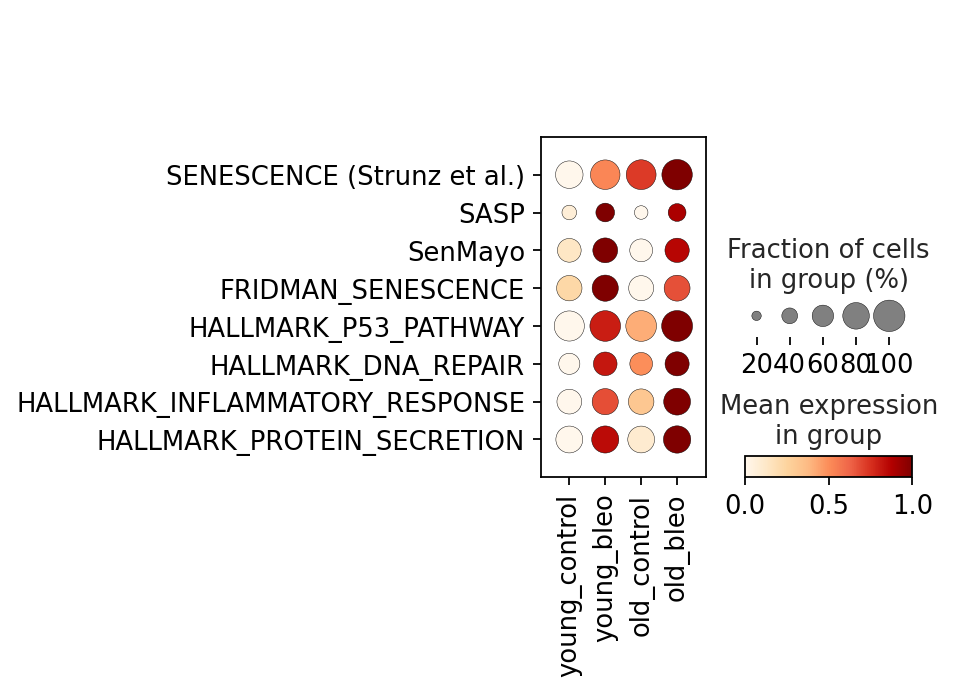

In [9]:
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE", 
               "HALLMARK_P53_PATHWAY","HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE","HALLMARK_PROTEIN_SECRETION"]

sc.pl.dotplot(adata, var_names=score_names, groupby=["age_treatment"], standard_scale="var", swap_axes=True, cmap="OrRd", 
              save=("senescence_signature_whole.pdf"))

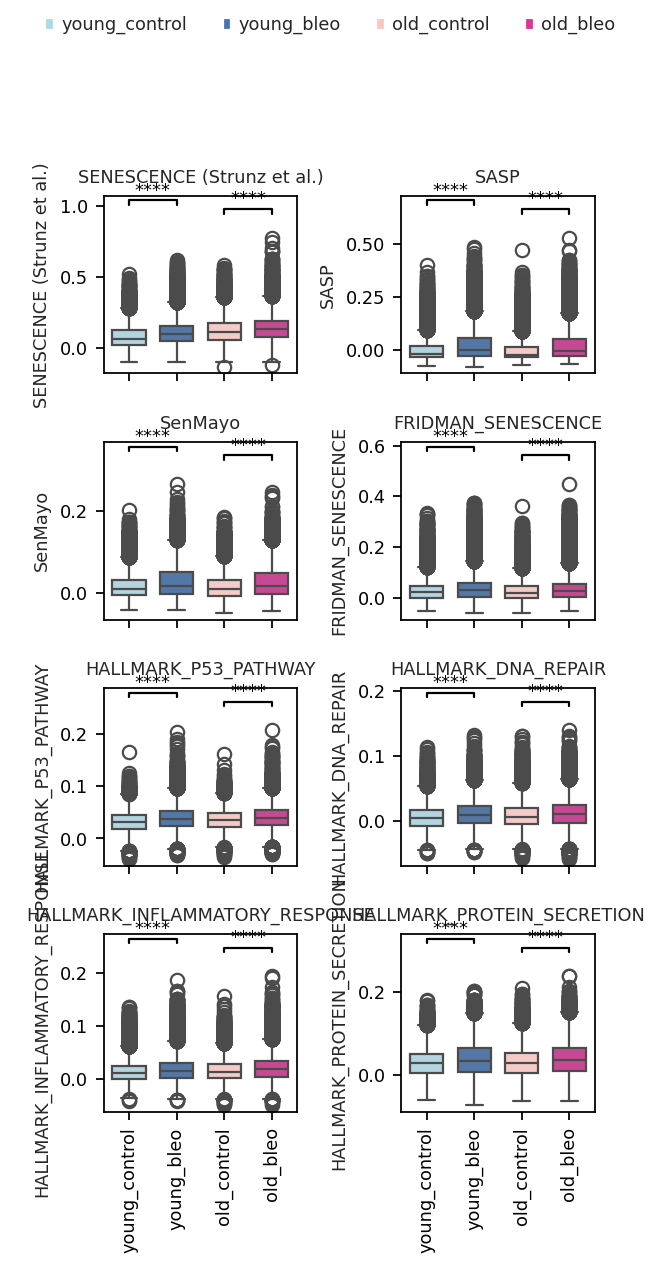

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu
import scanpy as sc
import numpy as np

# Settings
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE", 
               "HALLMARK_P53_PATHWAY", "HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE", "HALLMARK_PROTEIN_SECRETION"]
xlabel = "age_treatment"
cols = adata.uns["age_treatment_colors"]

order = ["young_control", "young_bleo", "old_control", "old_bleo"]

def get_significance_star(p):
    if p < 0.0001:
        return "****"
    elif p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

fig, axes = plt.subplots(4, 2, figsize=(4,8), sharey=False, sharex=True)
axes = axes.flatten()

for idx, s_name in enumerate(score_names):
    score = sc.get.obs_df(adata, keys=[s_name, xlabel], layer=None, use_raw=False)

    # Force category order
    score[xlabel] = score[xlabel].astype("category")
    score[xlabel] = score[xlabel].cat.set_categories(order)

    sns.boxplot(
        data=score,
        x=xlabel, 
        y=s_name, 
        palette=cols,
        width=0.7, 
        ax=axes[idx],
        order=order
    )

    # Expand y-axis AFTER plotting
    ymin, ymax = axes[idx].get_ylim()
    y_range = ymax - ymin
    extra_space = 0.25 * y_range  # add 25% of data range above
    axes[idx].set_ylim(ymin, ymax + extra_space)

    # Now get the updated ylim
    ymin, ymax = axes[idx].get_ylim()
    h = 0.05 * (ymax - ymin)  # spacing height for stars

    comparisons = [
        ("young_control", "young_bleo"),
        ("old_control", "old_bleo")
    ]

    for i, (group1_name, group2_name) in enumerate(comparisons):
        group1 = score[score[xlabel] == group1_name][s_name].dropna()
        group2 = score[score[xlabel] == group2_name][s_name].dropna()

        if len(group1) > 0 and len(group2) > 0:
            stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
            star = get_significance_star(p)

            x1 = order.index(group1_name)
            x2 = order.index(group2_name)

            y = ymax - (i+1)*h  # line and star y-position
            # Draw line
            axes[idx].plot([x1, x1, x2, x2],
                           [y, y+h/2, y+h/2, y],
                           lw=1, c='k')
            # Draw star
            axes[idx].text((x1 + x2) * 0.5, y+h/2 + h*0.1, star,
                           ha='center', va='bottom', color='k', fontsize=8)

    axes[idx].set_title(s_name, fontsize=8)
    axes[idx].tick_params(axis='x', labelsize=8, rotation=90)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(s_name, fontsize=8)
    axes[idx].grid(False)

# Manual color legend
legend_elements = [mpatches.Patch(facecolor=cols[i], label=order[i]) for i in range(len(order))]
fig.legend(handles=legend_elements, loc='upper center', ncol=4, frameon=False, fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/senescence_signature_whole_BP_significance.pdf", 
            dpi=300, bbox_inches='tight')
plt.show()

## Plot time-resolved (not cell type-resolved) for whole Alv. Epi

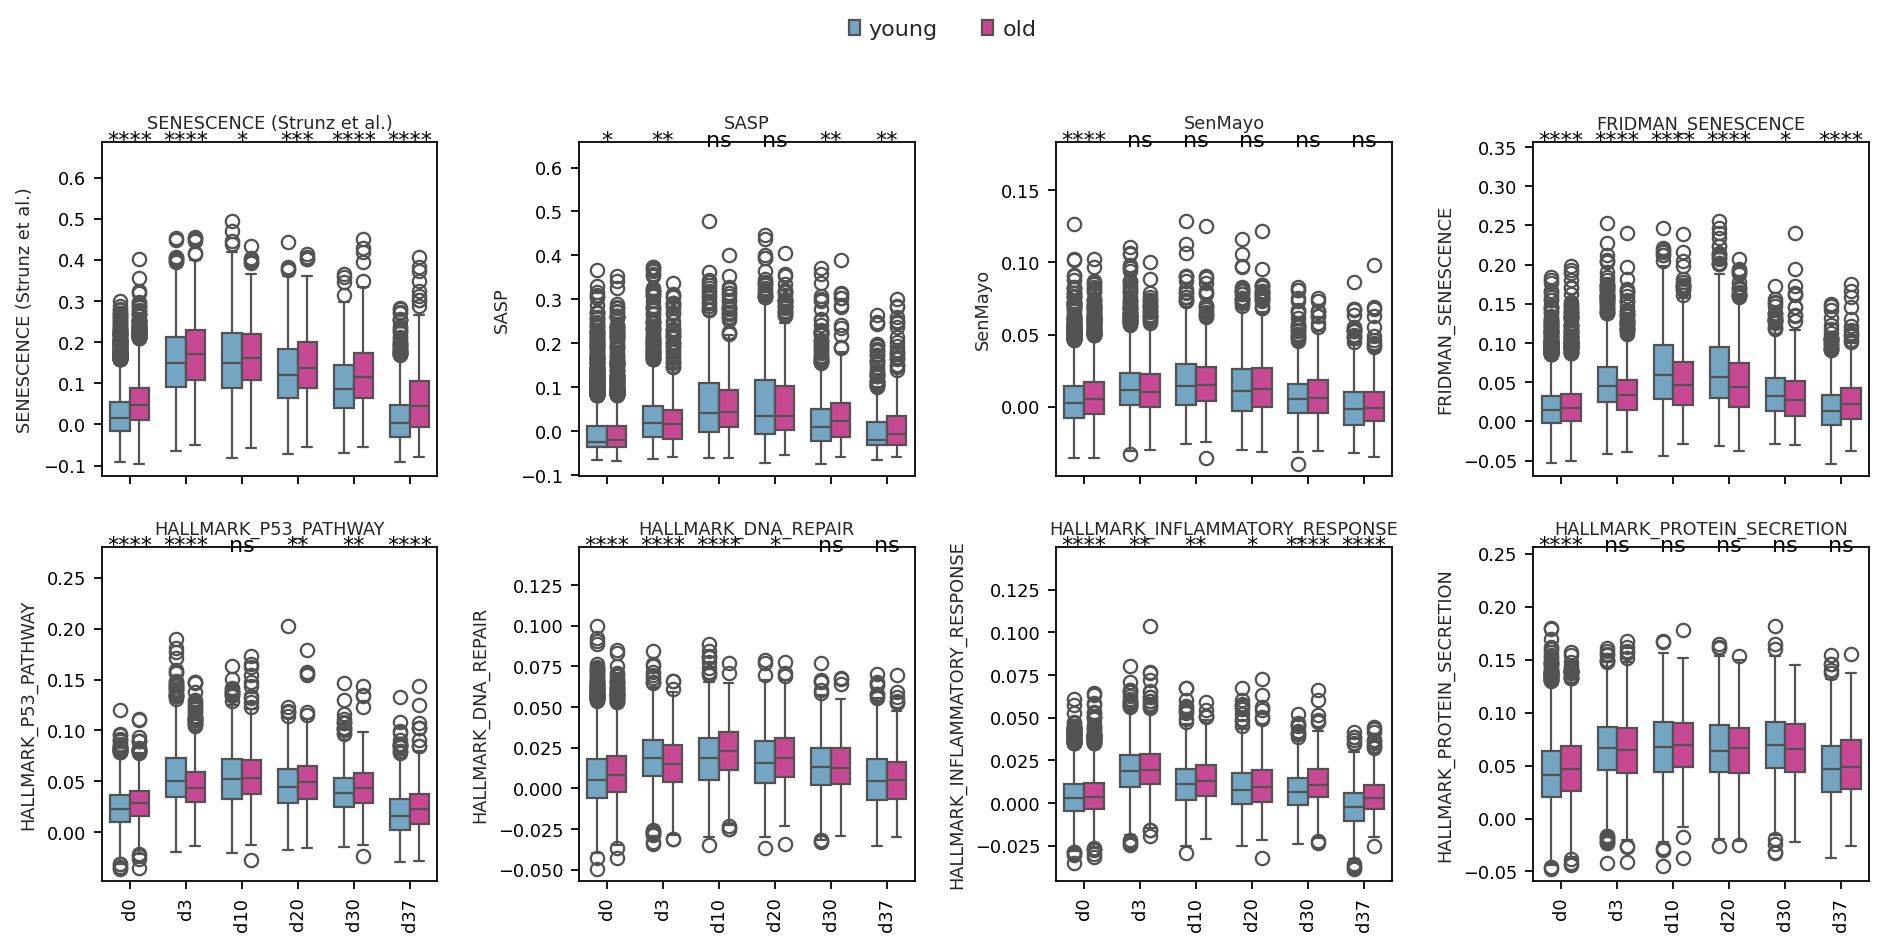

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu
import scanpy as sc
import numpy as np

# Settings
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE",
               "HALLMARK_P53_PATHWAY", "HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE", "HALLMARK_PROTEIN_SECRETION"]
xlabel = "day"
condition = "age"
cols = adata.uns["age_colors"]

# Filter cells
cells = adata.obs.cell_type.isin(["AT1", "AT2", "AT2 activated", "Krt8-ADI"])
adata_sub_alv = adata[cells]

# Define correct day order
day_order = ["d0", "d3", "d10", "d20", "d30", "d37"]

def get_significance_star(p):
    if p < 0.0001:
        return "****"
    elif p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6), sharey=False, sharex=True)
axes = axes.flatten()

for idx, s_name in enumerate(score_names):
    score = sc.get.obs_df(adata_sub_alv, keys=[s_name, condition, xlabel], layer=None, use_raw=False)

    # Force day order
    score[xlabel] = score[xlabel].astype("category")
    score[xlabel] = score[xlabel].cat.set_categories(day_order, ordered=True)
    
    sns.boxplot(
        data=score,
        x=xlabel,
        y=s_name,
        hue=condition,
        palette=cols,
        width=0.7,
        ax=axes[idx],
        order=day_order  # Force correct day order
    )

    axes[idx].set_title(s_name, fontsize=8)
    axes[idx].tick_params(axis='x', labelsize=8, rotation=90)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(s_name, fontsize=8)
    axes[idx].grid(False)
    axes[idx].legend_.remove()

    # Expand ylim slightly to make room
    ymin, ymax = axes[idx].get_ylim()
    y_range = ymax - ymin
    extra_space = 0.25 * y_range
    axes[idx].set_ylim(ymin, ymax + extra_space)

    # Update limits after expansion
    ymin, ymax = axes[idx].get_ylim()
    h = 0.05 * (ymax - ymin)

    # Add significance stars for each day
    for i, day in enumerate(day_order):
        group_day = score[score[xlabel] == day]
        young = group_day[group_day[condition] == "young"][s_name].dropna()
        old = group_day[group_day[condition] == "old"][s_name].dropna()

        if len(young) > 0 and len(old) > 0:
            stat, p = mannwhitneyu(young, old, alternative='two-sided')
            star = get_significance_star(p)

            positions = axes[idx].get_xticks()
            x = positions[i]

            axes[idx].text(x, ymax - (h * 0.5), star,
                           ha='center', va='bottom', color='k', fontsize=10)

# Manual legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), frameon=False, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/senescence_signature_alvEpi_BP_significance.pdf", 
            dpi=300, bbox_inches='tight')
plt.show()


## Plot time-resolved (not cell type-resolved) for fibroblasts

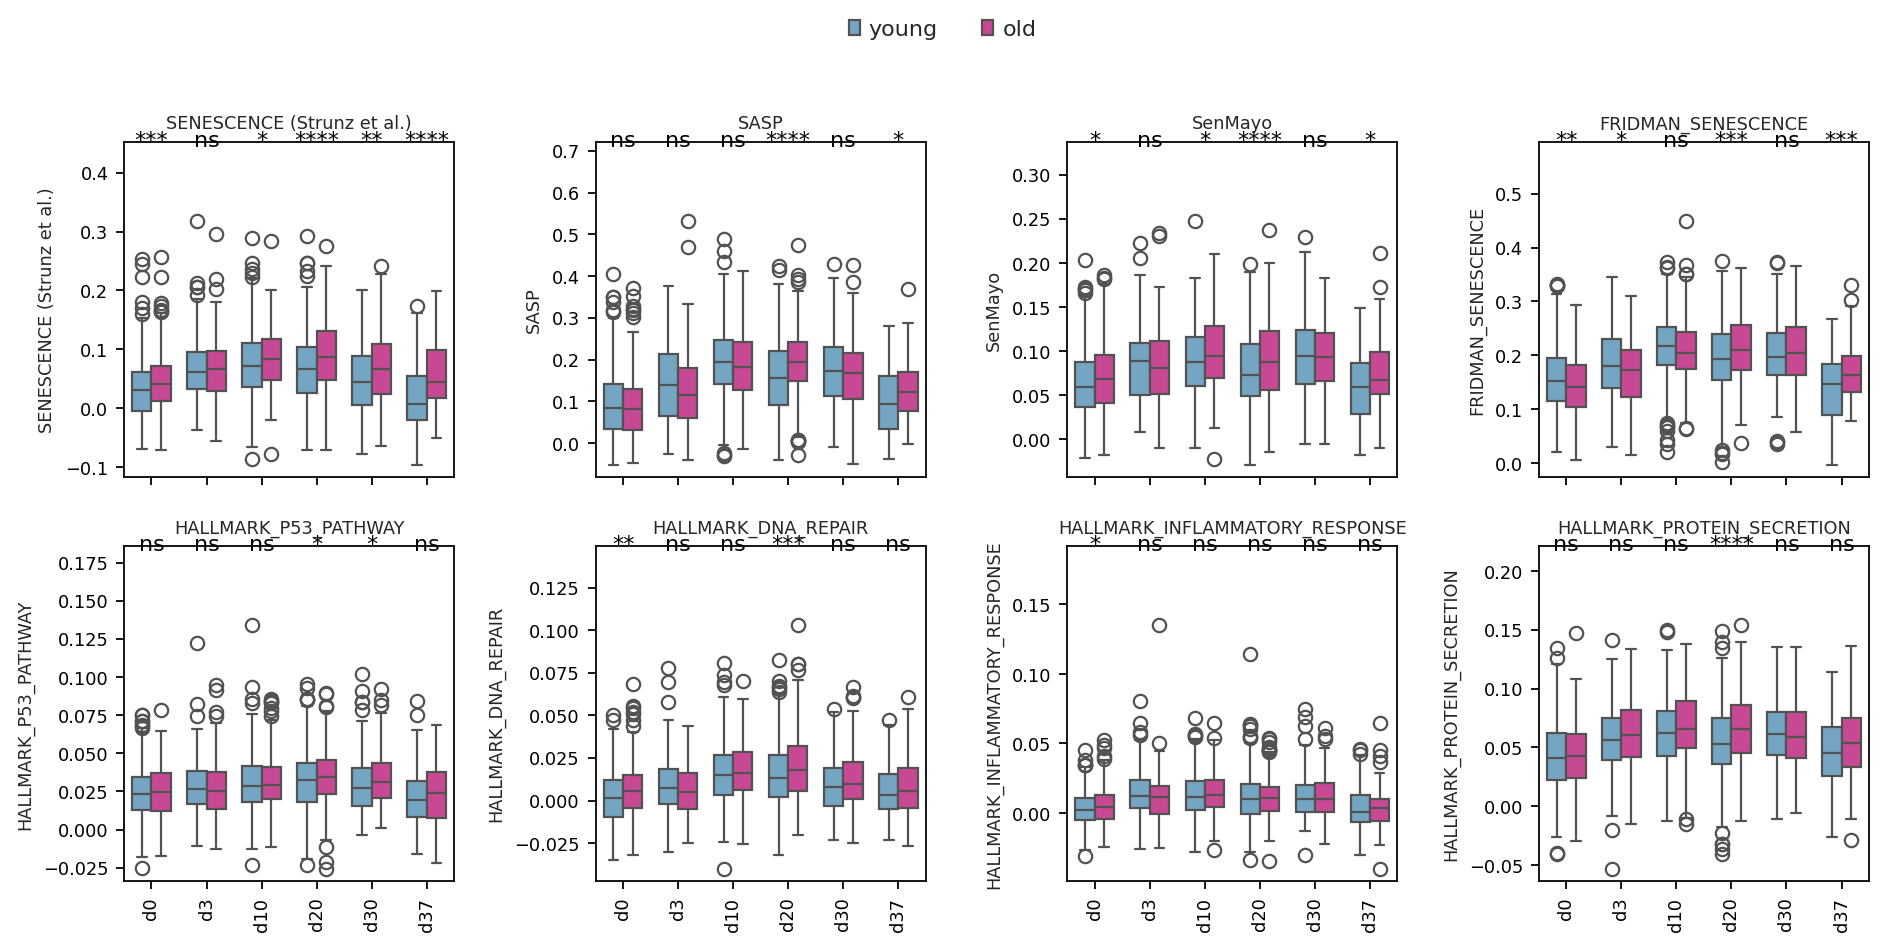

In [17]:
# Define scores and settings
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE", 
               "HALLMARK_P53_PATHWAY","HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE","HALLMARK_PROTEIN_SECRETION"]
xlabel = "day"
condition = "age"
cols = adata.uns["age_colors"]

# Filter relevant cells
cells = adata.obs.meta_label.isin(["Fibroblasts"])
adata_sub_fib = adata[cells]


# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6), sharey=False, sharex=True)
axes = axes.flatten()

for idx, s_name in enumerate(score_names):
    score = sc.get.obs_df(adata_sub_fib, keys=[s_name, condition, xlabel], layer=None, use_raw=False)

    # Force day order
    score[xlabel] = score[xlabel].astype("category")
    score[xlabel] = score[xlabel].cat.set_categories(day_order, ordered=True)
    
    sns.boxplot(
        data=score,
        x=xlabel,
        y=s_name,
        hue=condition,
        palette=cols,
        width=0.7,
        ax=axes[idx],
        order=day_order  # Force correct day order
    )

    axes[idx].set_title(s_name, fontsize=8)
    axes[idx].tick_params(axis='x', labelsize=8, rotation=90)
    axes[idx].tick_params(axis='y', labelsize=8)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel(s_name, fontsize=8)
    axes[idx].grid(False)
    axes[idx].legend_.remove()

    # Expand ylim slightly to make room
    ymin, ymax = axes[idx].get_ylim()
    y_range = ymax - ymin
    extra_space = 0.25 * y_range
    axes[idx].set_ylim(ymin, ymax + extra_space)

    # Update limits after expansion
    ymin, ymax = axes[idx].get_ylim()
    h = 0.05 * (ymax - ymin)

    # Add significance stars for each day
    for i, day in enumerate(day_order):
        group_day = score[score[xlabel] == day]
        young = group_day[group_day[condition] == "young"][s_name].dropna()
        old = group_day[group_day[condition] == "old"][s_name].dropna()

        if len(young) > 0 and len(old) > 0:
            stat, p = mannwhitneyu(young, old, alternative='two-sided')
            star = get_significance_star(p)

            positions = axes[idx].get_xticks()
            x = positions[i]

            axes[idx].text(x, ymax - (h * 0.5), star,
                           ha='center', va='bottom', color='k', fontsize=10)

# Manual legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels), frameon=False, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/senescence_signature_Fibroblasts_BP_significance.pdf", 
            dpi=300, bbox_inches='tight')
plt.show()

## Time- and cell type- resolved Heatmap in Alv. Epi

In [18]:
# Create group labels
adata.obs["group"] = adata.obs["cell_type"].astype(str) + "_" + adata.obs["age"].astype(str) + "_" + adata.obs["day"].astype(str)

# Define score columns
score_names = [
    "SENESCENCE (Strunz et al.)", 
    "FRIDMAN_SENESCENCE", 
    "SenMayo", 
    "HALLMARK_P53_PATHWAY",
    "HALLMARK_DNA_REPAIR", 
    "SASP", 
    "HALLMARK_INFLAMMATORY_RESPONSE", 
    "HALLMARK_PROTEIN_SECRETION"
]


cells = adata.obs.cell_type.isin(["AT1", "AT2", "AT2 activated", "Krt8-ADI"])
adata_sub_alv = adata[cells]

# Define custom cell type order
cell_type_order = {"AT2": 0, "AT2 activated": 1, "Krt8-ADI": 2, "AT1": 3}

# Define sort key
def make_sort_key(row):
    age_order = {"young": 0, "old": 1}
    day_order = {"d0": 0, "d3": 1, "d10": 2, "d20": 3, "d30": 4, "d37": 5}
    return (
        cell_type_order[row["cell_type"]],
        age_order[row["age"]],
        day_order[row["day"]]
    )

# Apply sort key
adata_sub_alv.obs["sort_key"] = adata_sub_alv.obs.apply(make_sort_key, axis=1)

# Group and compute mean
grouped = adata_sub_alv.obs.groupby("group")
summary_df = grouped[score_names].mean()
summary_df = summary_df.reset_index()

# Split group to get separate columns again
summary_df[["cell_type", "age", "day"]] = summary_df["group"].str.split("_", expand=True)

# Apply sorting
summary_df["sort_key"] = summary_df.apply(make_sort_key, axis=1)
summary_df = summary_df.sort_values(by="sort_key")

# Drop helper columns
summary_df = summary_df.drop(columns=["cell_type", "age", "day", "sort_key"])

# Set group as index
summary_df = summary_df.set_index("group")

# Save
summary_df.to_csv("signature_scores_summary.csv", index=True)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: grid
ComplexHeatmap version 2.22.0
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite either one:
- Gu, Z. Complex Heatmap Visualization. iMeta 2022.
- Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
    genomic data. Bioinformatics 2016.


The new InteractiveComplexHeatmap package can directly export static 
complex heatmaps into an interactive Shiny app with zero effort. Have a try!

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))

circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and

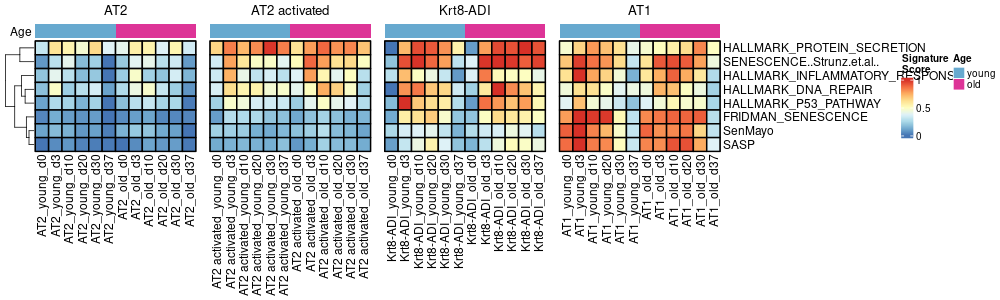

In [19]:
%%R -i plot_folder -w 1000 -h 300
library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(RColorBrewer)

# Read CSV
data <- read.csv("signature_scores_summary.csv", row.names = 1)

# Transpose
data_t <- t(data)

# Min-max scaling
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
data_scaled <- t(apply(data_t, 1, min_max_scaling))

# Extract group info
group_names <- colnames(data_scaled)
split_info <- strsplit(group_names, "_")

cell_types <- sapply(split_info, `[`, 1)
ages <- sapply(split_info, `[`, 2)

# Set manual order
cell_types = factor(cell_types, levels = c("AT2", "AT2 activated", "Krt8-ADI", "AT1"))

# Set 'ages' as a factor to enforce "young" first
ages = factor(ages, levels = c("young", "old"))

# Order columns by cell_type, then age
order_idx <- order(cell_types, ages)
data_scaled <- data_scaled[, order_idx]
cell_types <- cell_types[order_idx]
ages <- ages[order_idx]

# Define your age colors
cols_age = c(
  "young" = "#67a9cf",
  "old" = "#dd3497"
)

top_anno = HeatmapAnnotation(
  Age = ages,
  col = list(Age = cols_age),
  annotation_name_side = "left"
)

# Now plot
p2<-Heatmap(
  data_scaled,
  name = "Signature\nScore",
  #col = colorRamp2(c(0, 0.5, 1), brewer.pal(9, "OrRd")[c(1,5,9)]),
  col = colorRampPalette(rev(brewer.pal(9, "RdYlBu")))(100),
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  column_split = cell_types,       
  column_gap = unit(5, "mm"),       
  rect_gp = gpar(col = "black", lwd = 2), 
  border = TRUE,
  top_annotation = top_anno         # << Add customized top bar for age
)

p2

In [20]:
%%R -i plot_folder 
pdf(file = paste0(plot_folder, "/heatmap_senescence_alv_epi_CT_resolved.pdf"), width = 17, height = 5)
draw(p2)

## Time- and cell type- resolved Heatmap in Fibroblasts

In [21]:
# Create group labels
adata.obs["group"] = adata.obs["cell_type"].astype(str) + "_" + adata.obs["age"].astype(str) + "_" + adata.obs["day"].astype(str)

# Define score columns
score_names = [
    "SENESCENCE (Strunz et al.)", 
    "FRIDMAN_SENESCENCE", 
    "SenMayo", 
    "HALLMARK_P53_PATHWAY",
    "HALLMARK_DNA_REPAIR", 
    "SASP", 
    "HALLMARK_INFLAMMATORY_RESPONSE", 
    "HALLMARK_PROTEIN_SECRETION"
]


cells = adata.obs.cell_type.isin(['Adventitial fibroblasts','Lipofibroblasts','Transition','Spp1+ myofibroblasts',
         'Cthrc1+ myofibroblasts','Adh7+ fibroblasts','Lgr5+ Lgr6+ fibroblasts','Lgr5- Lgr6+ fibroblasts'])
adata_sub_fib = adata[cells]

# Define custom cell type order
cell_type_order = {
    'Adventitial fibroblasts': 0,
    'Lipofibroblasts': 1,
    'Transition': 2,
    'Spp1+ myofibroblasts': 3,
    'Cthrc1+ myofibroblasts': 4,
    'Adh7+ fibroblasts': 5,
    'Lgr5+ Lgr6+ fibroblasts': 6,
    'Lgr5- Lgr6+ fibroblasts': 7
}

# Define sort key
def make_sort_key(row):
    age_order = {"young": 0, "old": 1}
    day_order = {"d0": 0, "d3": 1, "d10": 2, "d20": 3, "d30": 4, "d37": 5}
    return (
        cell_type_order[row["cell_type"]],
        age_order[row["age"]],
        day_order[row["day"]]
    )

# Apply sort key
adata_sub_fib.obs["sort_key"] = adata_sub_fib.obs.apply(make_sort_key, axis=1)

# Group and compute mean
grouped = adata_sub_fib.obs.groupby("group")
summary_df = grouped[score_names].mean()
summary_df = summary_df.reset_index()

# Split group to get separate columns again
summary_df[["cell_type", "age", "day"]] = summary_df["group"].str.split("_", expand=True)

# Apply sorting
summary_df["sort_key"] = summary_df.apply(make_sort_key, axis=1)
summary_df = summary_df.sort_values(by="sort_key")

# Drop helper columns
summary_df = summary_df.drop(columns=["cell_type", "age", "day", "sort_key"])

# Set group as index
summary_df = summary_df.set_index("group")

# Save
summary_df.to_csv("fibroblasts_signature_scores_summary.csv", index=True)


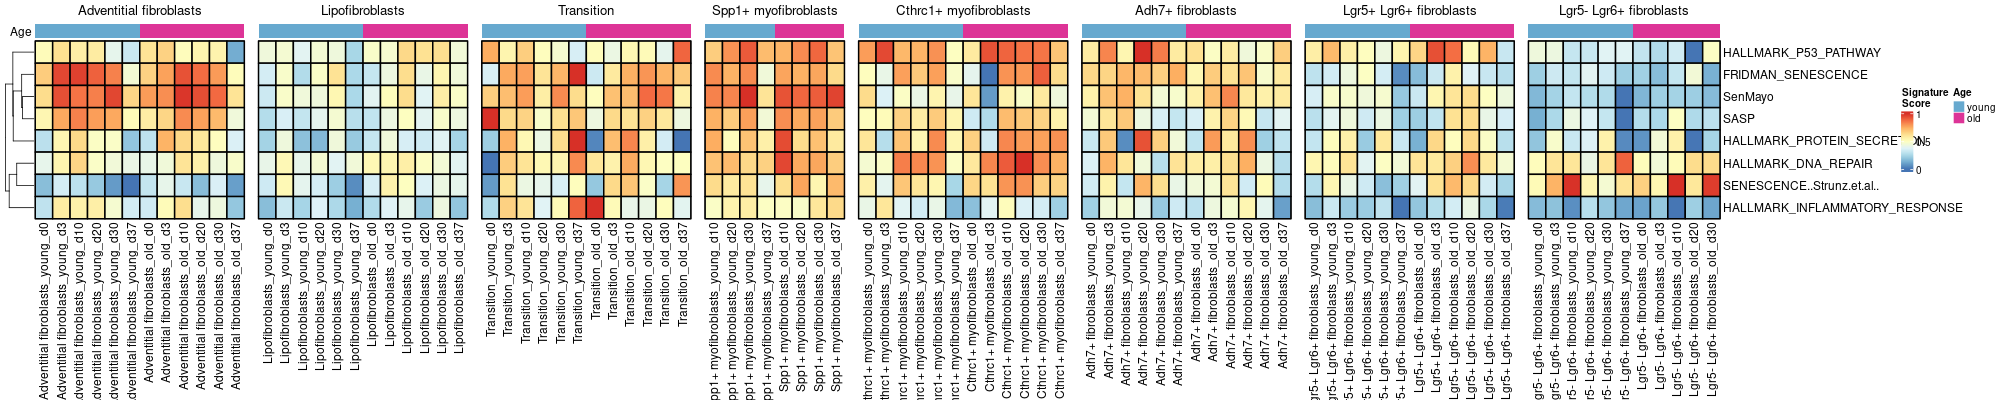

In [22]:
%%R -i plot_folder -w 2000 -h 400
library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(RColorBrewer)

# Read CSV
data <- read.csv("fibroblasts_signature_scores_summary.csv", row.names = 1)

# Transpose
data_t <- t(data)

# Min-max scaling
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
data_scaled <- t(apply(data_t, 1, min_max_scaling))

# Extract group info
group_names <- colnames(data_scaled)
split_info <- strsplit(group_names, "_")

cell_types <- sapply(split_info, `[`, 1)
ages <- sapply(split_info, `[`, 2)

# Set manual order
cell_types = factor(cell_types, levels = c('Adventitial fibroblasts','Lipofibroblasts','Transition','Spp1+ myofibroblasts',
         'Cthrc1+ myofibroblasts','Adh7+ fibroblasts','Lgr5+ Lgr6+ fibroblasts','Lgr5- Lgr6+ fibroblasts'))

# Set 'ages' as a factor to enforce "young" first
ages = factor(ages, levels = c("young", "old"))

# Order columns by cell_type, then age
order_idx <- order(cell_types, ages)
data_scaled <- data_scaled[, order_idx]
cell_types <- cell_types[order_idx]
ages <- ages[order_idx]

# Define your age colors
cols_age = c(
  "young" = "#67a9cf",
  "old" = "#dd3497"
)

top_anno = HeatmapAnnotation(
  Age = ages,
  col = list(Age = cols_age),
  annotation_name_side = "left"
)

# Now plot
p3<-Heatmap(
  data_scaled,
  name = "Signature\nScore",
  #col = colorRamp2(c(0, 0.5, 1), brewer.pal(9, "OrRd")[c(1,5,9)]),
  col = colorRampPalette(rev(brewer.pal(9, "RdYlBu")))(100),
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  column_split = cell_types,       
  column_gap = unit(5, "mm"),       
  rect_gp = gpar(col = "black", lwd = 2), 
  border = TRUE,
  top_annotation = top_anno         # << Add customized top bar for age
)
p3


In [25]:
%%R -i plot_folder 
pdf(file = paste0(plot_folder, "/heatmap_senescence_fibs_CT_resolved.pdf"), width = 22, height = 5)
draw(p3)

## Average Scoring Heatmap in Alv. Epi (Time- yet not cell type-resolved)

In [23]:
# Define scores and settings
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE", 
               "HALLMARK_P53_PATHWAY", "HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE", "HALLMARK_PROTEIN_SECRETION"]

xlabel = "day"
condition = "age"

# Filter for alveolum cells
cells = adata.obs.cell_type.isin(["AT1", "AT2", "AT2 activated", "Krt8-ADI"])
adata_sub_alv = adata[cells]

# Create group labels: age_day
adata_sub_alv.obs["age_day"] = adata_sub_alv.obs[condition].astype(str) + "_" + adata_sub_alv.obs[xlabel].astype(str)

# Group by age_day
grouped = adata_sub_alv.obs.groupby("age_day")[score_names].mean()

# Optional: sort by age (young first, old second) and day (d0, d3, d10, etc.)
# Extract age and day
grouped["age"] = grouped.index.str.split("_").str[0]
grouped["day"] = grouped.index.str.split("_").str[1]

# Set manual order
age_order = {"young": 0, "old": 1}
day_order = {"d0": 0, "d3": 1, "d10": 2, "d20": 3, "d30": 4, "d37": 5}

grouped["sort_key"] = grouped.apply(lambda row: (age_order[row["age"]], day_order[row["day"]]), axis=1)
grouped = grouped.sort_values("sort_key")

# Drop helper columns
grouped = grouped.drop(columns=["age", "day", "sort_key"])

# Save for R heatmap
grouped.to_csv("alveolum_signature_scores_summary.csv")


[1] "HALLMARK_PROTEIN_SECRETION"     "SENESCENCE..Strunz.et.al.."    
[3] "HALLMARK_P53_PATHWAY"           "SenMayo"                       
[5] "HALLMARK_DNA_REPAIR"            "SASP"                          
[7] "FRIDMAN_SENESCENCE"             "HALLMARK_INFLAMMATORY_RESPONSE"


In addition: Warning message:
The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`. 


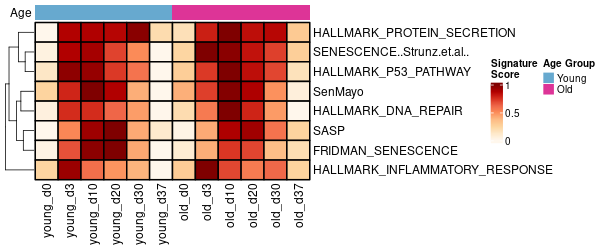

In [24]:
%%R -i plot_folder -w 600 -h 250

library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(RColorBrewer)


# Read the CSV you exported
data <- read.csv("alveolum_signature_scores_summary.csv", row.names = 1)

# Transpose: signatures = rows, groups = columns
data_t <- t(data)

# Min-max scaling
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
data_scaled <- t(apply(data_t, 1, min_max_scaling))

# Extract age info
group_names <- colnames(data_scaled)
ages <- sapply(strsplit(group_names, "_"), `[`, 1)

# Set age factor order
ages = factor(ages, levels = c("young", "old"))

# Define age colors
cols_age = c(
  "young" = "#67a9cf",
  "old" = "#dd3497"
)

# Create top annotation
top_anno = HeatmapAnnotation(
  Age = ages,
  col = list(Age = cols_age),
  annotation_name_side = "left",
  annotation_legend_param = list(
    Age = list(
      title = "Age Group",
      at = c("young", "old"),
      labels = c("Young", "Old")
    )
  )
)

# Plot the heatmap
p <- Heatmap(
  data_scaled,
  name = "Signature\nScore",
  col = colorRampPalette(brewer.pal(9, "OrRd"))(100),
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  column_gap = unit(2, "mm"),
  rect_gp = gpar(col = "black", lwd = 2),
  border = TRUE,
  top_annotation = top_anno
)

draw(p)

# Extract row order (indexes)
row_order_idx = row_order(p)
# Extract the row names in order
row_names_in_order = rownames(data_scaled)[row_order_idx]
# Print
print(row_names_in_order)

In [25]:
%%R 

# Extract row order (indexes)
row_order_idx = row_order(p)
# Extract the row names in order
row_names_in_order = rownames(data_scaled)[row_order_idx]
# Print
print(row_names_in_order)

[1] "HALLMARK_PROTEIN_SECRETION"     "SENESCENCE..Strunz.et.al.."    
[3] "HALLMARK_P53_PATHWAY"           "SenMayo"                       
[5] "HALLMARK_DNA_REPAIR"            "SASP"                          
[7] "FRIDMAN_SENESCENCE"             "HALLMARK_INFLAMMATORY_RESPONSE"


In addition: Warning message:
The heatmap has not been initialized. You might have different results
if you repeatedly execute this function, e.g. when row_km/column_km was
set. It is more suggested to do as `ht = draw(ht); row_order(ht)`. 


In [26]:
%%R -i plot_folder 
pdf(file = paste0(plot_folder, "/heatmap_senescence_alv_epi.pdf"), width = 10, height = 5)
draw(p)

## Average Scoring Heatmap in Fibroblasts (Time- yet not cell type-resolved)

In [27]:
# Define scores and settings
score_names = ["SENESCENCE (Strunz et al.)", "SASP", "SenMayo", "FRIDMAN_SENESCENCE", 
               "HALLMARK_P53_PATHWAY", "HALLMARK_DNA_REPAIR", "HALLMARK_INFLAMMATORY_RESPONSE", "HALLMARK_PROTEIN_SECRETION"]

xlabel = "day"
condition = "age"

# Filter relevant cells
cells = adata.obs.meta_label.isin(["Fibroblasts"])
adata_sub_fib = adata[cells]


# Create group labels: age_day
adata_sub_fib.obs["age_day"] = adata_sub_fib.obs[condition].astype(str) + "_" + adata_sub_fib.obs[xlabel].astype(str)

# Group by age_day
grouped = adata_sub_fib.obs.groupby("age_day")[score_names].mean()

# Optional: sort by age (young first, old second) and day (d0, d3, d10, etc.)
# Extract age and day
grouped["age"] = grouped.index.str.split("_").str[0]
grouped["day"] = grouped.index.str.split("_").str[1]

# Set manual order
age_order = {"young": 0, "old": 1}
day_order = {"d0": 0, "d3": 1, "d10": 2, "d20": 3, "d30": 4, "d37": 5}

grouped["sort_key"] = grouped.apply(lambda row: (age_order[row["age"]], day_order[row["day"]]), axis=1)
grouped = grouped.sort_values("sort_key")

# Drop helper columns
grouped = grouped.drop(columns=["age", "day", "sort_key"])

# Save for R heatmap
grouped.to_csv("fibroblasts_signature_scores_summary.csv")

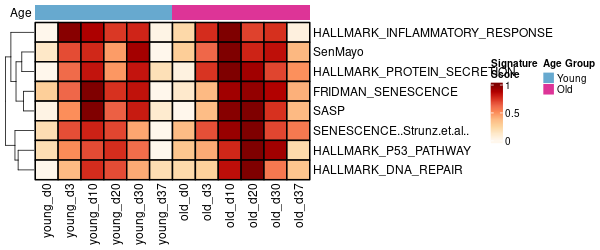

In [51]:
%%R -i plot_folder -w 600 -h 250

library(ComplexHeatmap)
library(circlize)
library(tidyverse)
library(RColorBrewer)

# Read the CSV you exported
data <- read.csv("fibroblasts_signature_scores_summary.csv", row.names = 1)

# Transpose: signatures = rows, groups = columns
data_t <- t(data)

# Min-max scaling
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}
data_scaled <- t(apply(data_t, 1, min_max_scaling))
#data_scaled_reordered <- data_scaled[row_names_in_order, ]
# Extract age info
group_names <- colnames(data_scaled)
ages <- sapply(strsplit(group_names, "_"), `[`, 1)

# Set age factor order
ages = factor(ages, levels = c("young", "old"))

# Define age colors
cols_age = c(
  "young" = "#67a9cf",
  "old" = "#dd3497"
)

# Create top annotation
top_anno = HeatmapAnnotation(
  Age = ages,
  col = list(Age = cols_age),
  annotation_name_side = "left",
  annotation_legend_param = list(
    Age = list(
      title = "Age Group",
      at = c("young", "old"),
      labels = c("Young", "Old")
    )
  )
)

# Plot the heatmap
p1 <- Heatmap(
  data_scaled,
  name = "Signature\nScore",
  col = colorRampPalette(brewer.pal(9, "OrRd"))(100),
  cluster_rows = TRUE,
  cluster_columns = FALSE,
  column_gap = unit(2, "mm"),
  rect_gp = gpar(col = "black", lwd = 2),
  border = TRUE,
  top_annotation = top_anno
)
p1

In [52]:
%%R -i plot_folder 
pdf(file = paste0(plot_folder, "/heatmap_senescence_fibs.pdf"), width = 10, height = 5)
draw(p1)

## Cdkn2a expression in Alv. Epi

In [44]:
alv = adata[adata.obs.meta_label.isin(['Alveolum'])].copy()

In [45]:
xlabel = "day"                            ## in which column the time info is stored
order = alv.obs[xlabel].cat.categories
print(order)
alv.obs["days_numeric"] = [list(order).index(i) for i in alv.obs[xlabel]]

Index(['d0', 'd3', 'd10', 'd20', 'd30', 'd37'], dtype='object')


In [46]:
xlabel = "days_numeric"                       ## in which column the numeric time info is stored
cluster = "all"                               ## set to all if you want to see all cluster not just a subset
cluster_label = "age"   
order = alv.obs["day"].cat.categories 
## where cluster information is stored
genExp = codes.generate_expr_table(alv, cluster = cluster, xlabel = xlabel, typ = cluster_label)

Saving figure to /home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/_AvgExp_Cdkn2a_AlvEpi.pdf


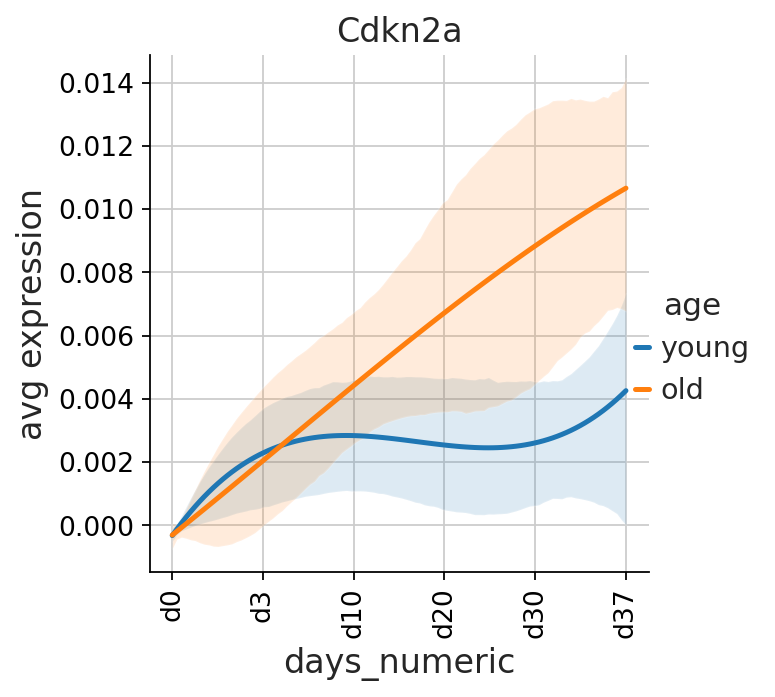

In [50]:
genes = ["Cdkn2a"]
codes.plot_avg_expression_splitCluster(genExp, genes, order, xlabel = xlabel, typ = cluster_label, smooth = True,
                                             scatter = None, figsize = (5,4), rotation = True, 
                                             save = ("/home/gotej/Projects/Aging_BleoModel/Paper_figures/figures/" + "_AvgExp_Cdkn2a_AlvEpi.pdf"),
                                             conf_int = 68, order_smooth=3)